# BaseBall Project

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [177]:
import warnings
warnings.filterwarnings('ignore')

In [178]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [179]:
df.shape

(30, 17)

In [180]:
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [182]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


We will plot heatmap to see how feature are related to label

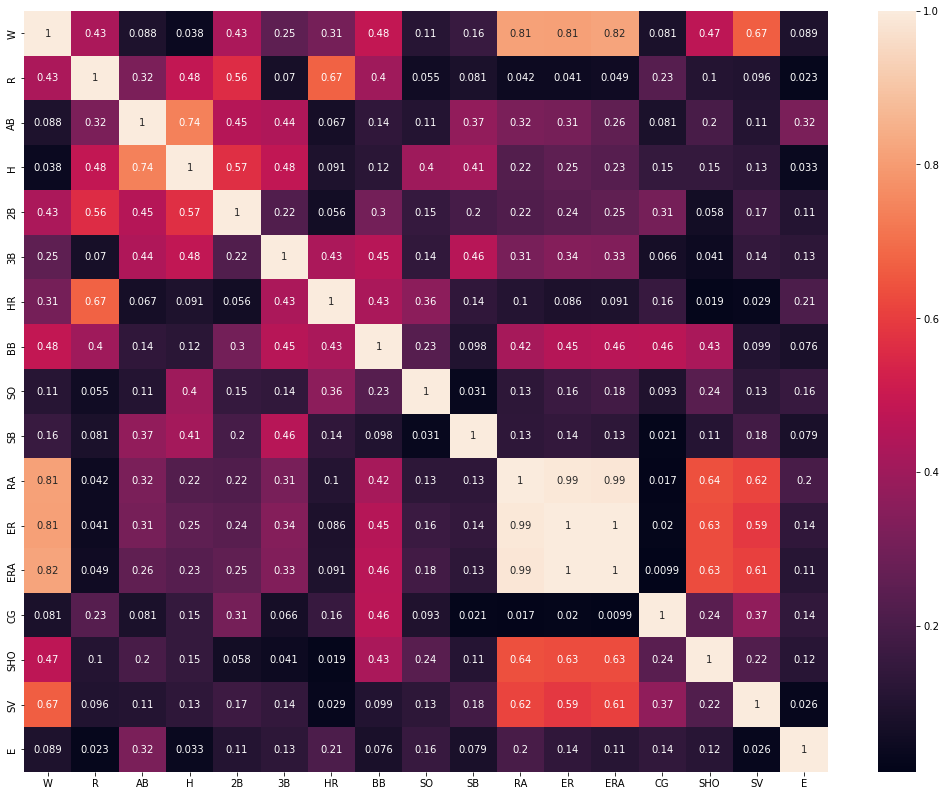

In [183]:
df_corr = df.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

Checking coefficient of one varaible against other we dont find multicollinearity problem since all values are less than 0.80. And R,2B,HR,BB,RA,ER,ERA,SHO,SV are coreleated with label.

In [184]:
y = df['W']
x = df.drop(columns=['W'])

In [185]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [186]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


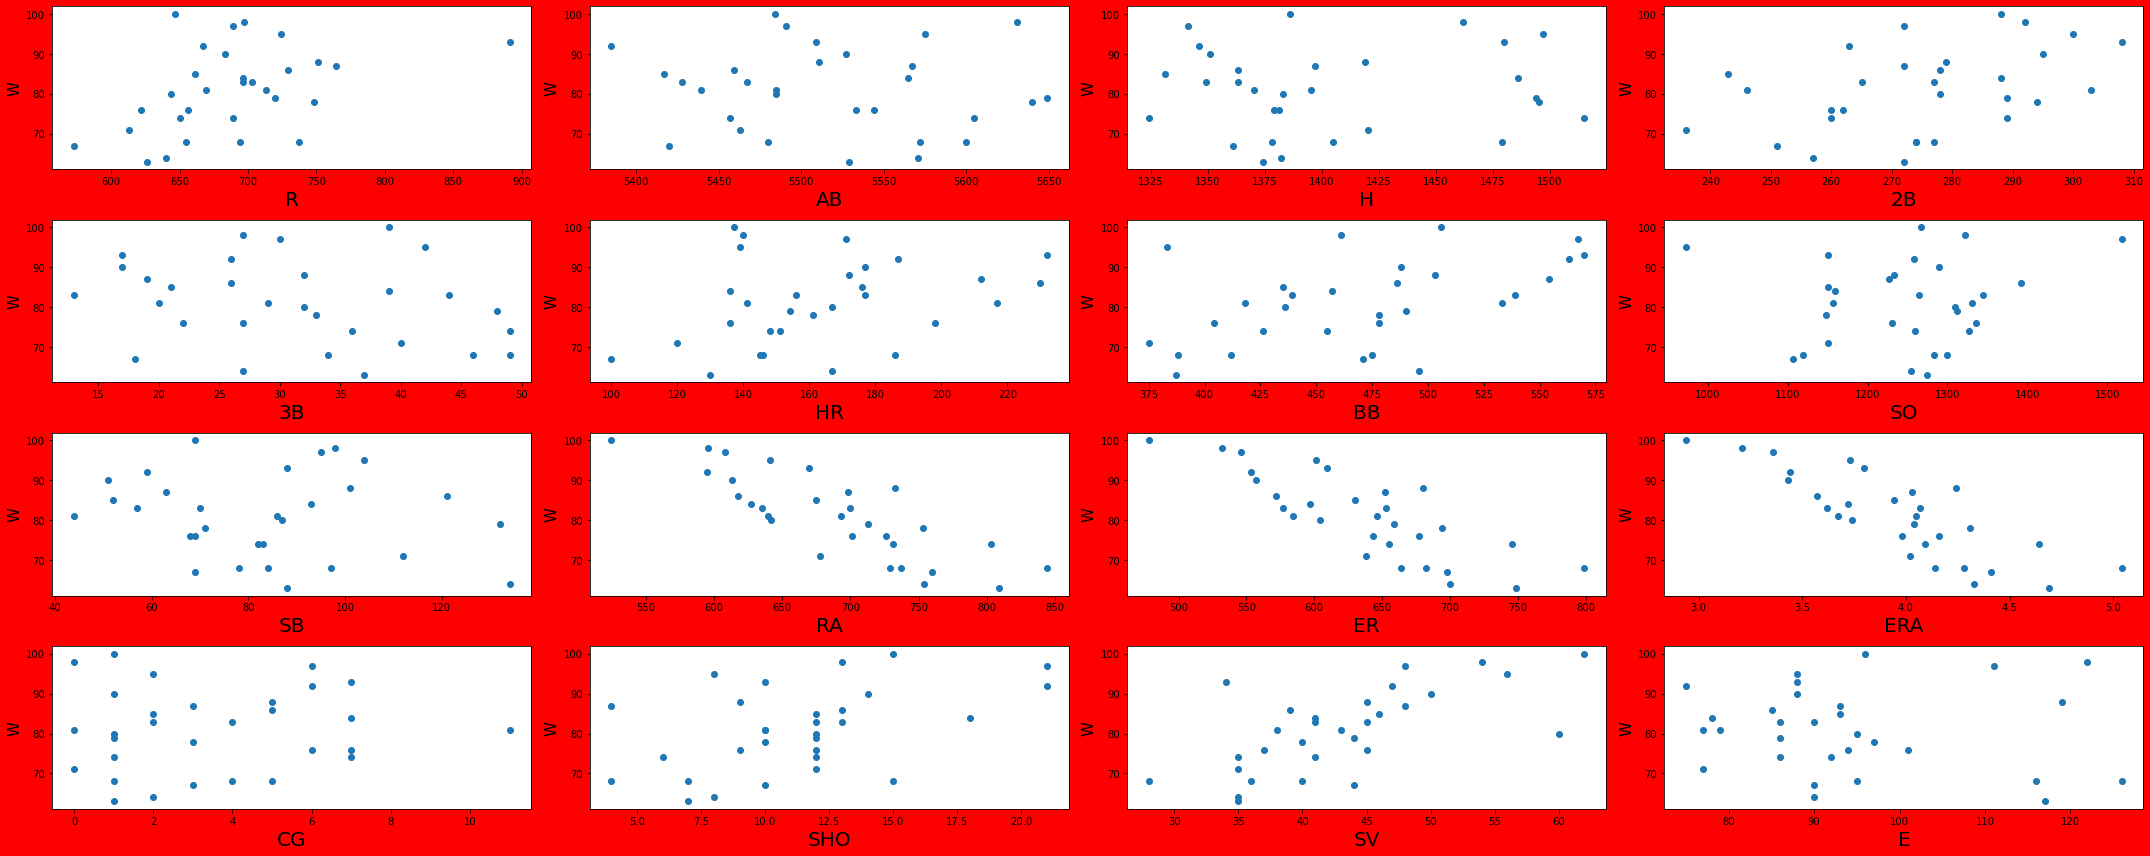

In [187]:
plt.figure(figsize=(30,12),facecolor='red')
plotnumber = 1
for column in x:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('W',fontsize=15)
    plotnumber +=1
plt.tight_layout()

Correlated with Wins: Runs(R),Doubles(2B),Home run(HR),Walk(BB),SHO,SV,
Weakly correlated with Wins: At Balls(AB), Hits(H)
Highly Negative Correlated with wins:Runs Allowed(RA),Earned Runs(ER),ERA
Not correlated with Wins: Strikeouts(SO),Stolen Bases(SB),CG,ER

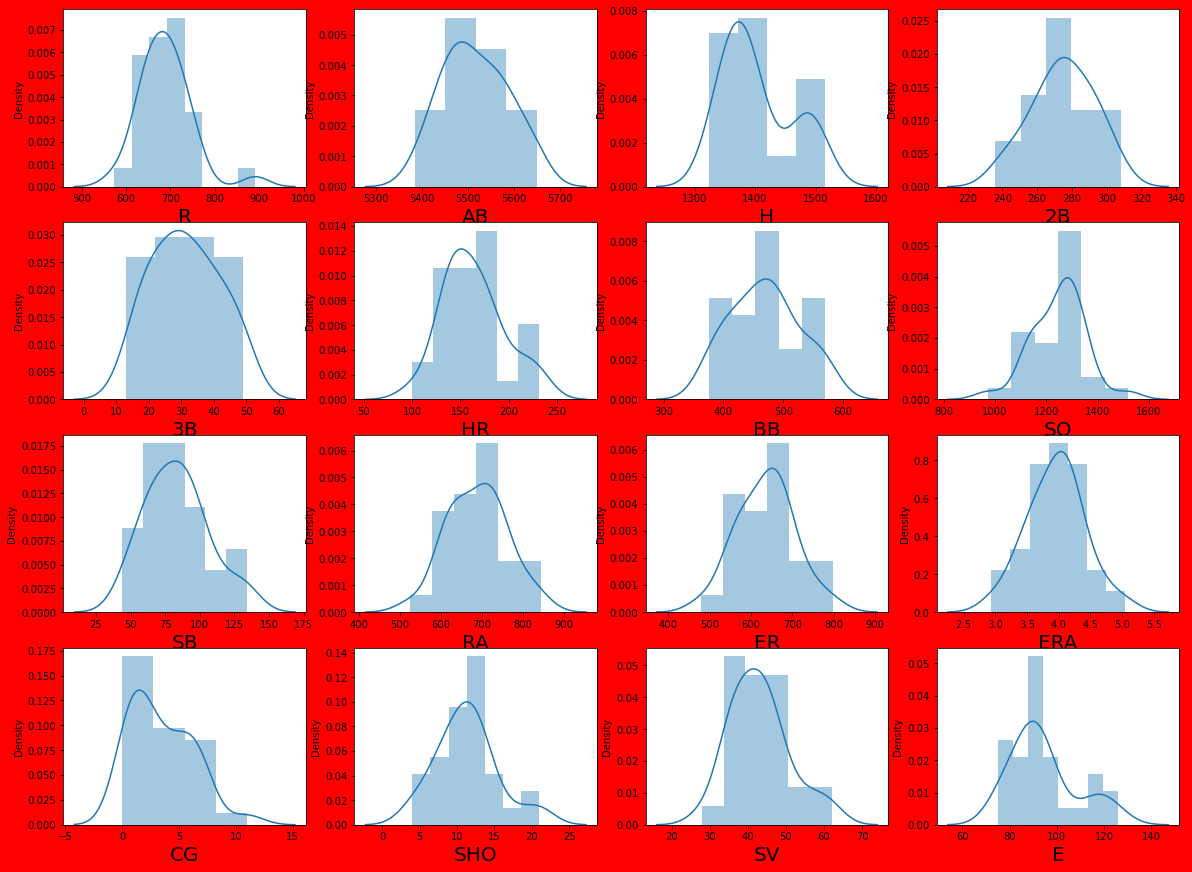

In [188]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber = 1
for column in x:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

There is presence of skewness.

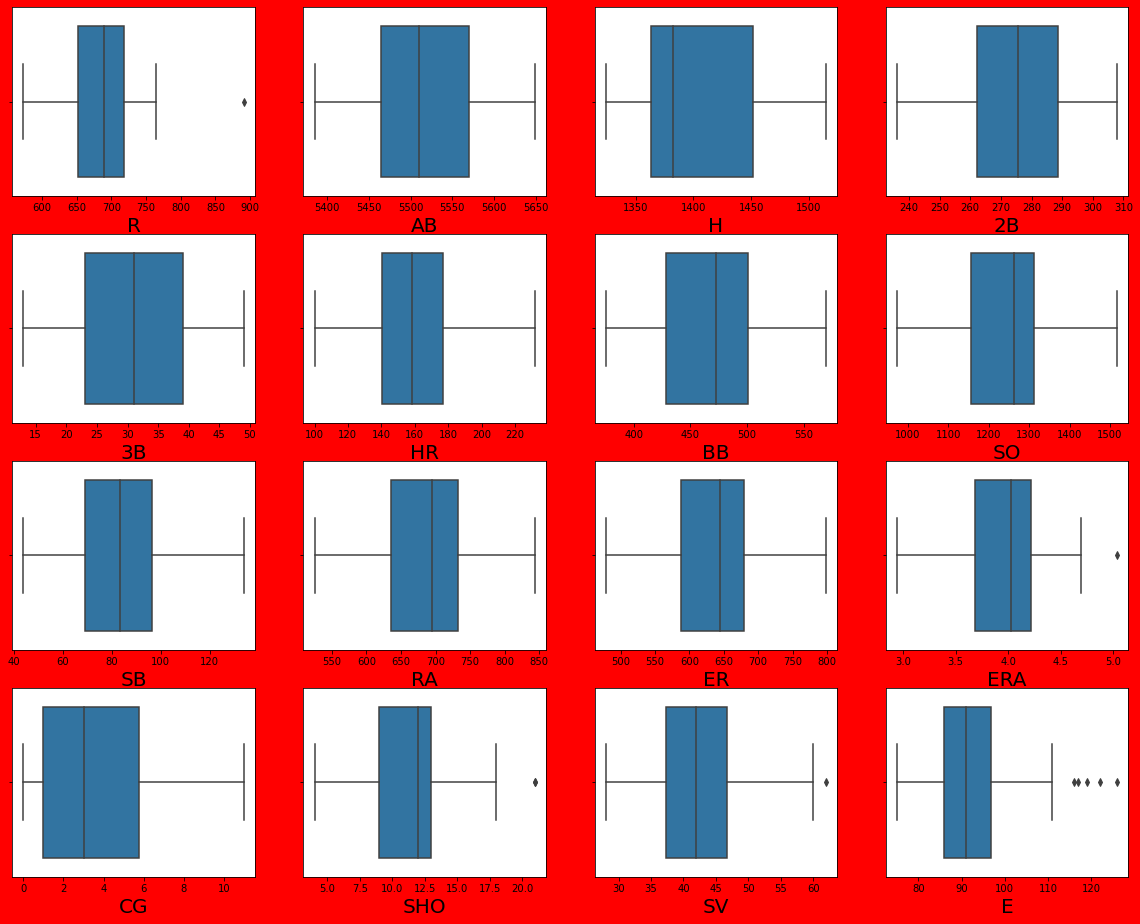

In [189]:
plt.figure(figsize=(20,16),facecolor='red')
graph = 1
for column in x:
    if graph <= 16:
        ax = plt.subplot(4,4,graph)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    graph += 1  
    
plt.show()

Normally S.D of 3 is considered and we dont have too many ouliers also. So we will take S.D of 3 and will use z distribution to remove skewness.

In [190]:
from scipy.stats import zscore

In [191]:
z_score = zscore(df[['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']])

In [192]:
ab_z_score = np.abs(z_score)

In [193]:
filter_entry = (ab_z_score < 2).all(axis=1)

In [194]:
df = df[filter_entry]
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,79.333333,687.533333,5517.00000,1394.133333,271.733333,29.533333,166.133333,458.200000,1258.133333,71.733333,708.933333,655.866667,4.083333,3.333333,10.333333,42.133333,95.133333
std,7.593857,43.778447,62.88084,59.323407,16.011008,10.629250,27.163175,48.622746,66.787367,16.610955,57.320486,53.705369,0.338836,2.497618,3.538899,4.453998,13.114151
min,63.000000,622.000000,5417.00000,1324.000000,243.000000,13.000000,130.000000,387.000000,1148.000000,44.000000,613.000000,557.000000,3.430000,0.000000,4.000000,35.000000,77.000000
25%,75.000000,655.500000,5473.50000,1357.000000,261.000000,20.500000,146.500000,422.000000,1229.000000,60.000000,684.000000,636.500000,3.960000,1.000000,8.000000,40.000000,87.000000
50%,81.000000,689.000000,5527.00000,1378.000000,272.000000,32.000000,161.000000,455.000000,1264.000000,70.000000,701.000000,653.000000,4.070000,3.000000,10.000000,41.000000,93.000000
75%,84.500000,708.000000,5554.50000,1408.000000,283.500000,36.500000,177.000000,483.000000,1313.000000,83.500000,735.000000,681.000000,4.260000,5.500000,12.000000,45.000000,99.000000
max,90.000000,764.000000,5640.00000,1515.000000,295.000000,49.000000,217.000000,554.000000,1344.000000,101.000000,809.000000,749.000000,4.690000,7.000000,18.000000,50.000000,119.000000


Again plot boxplot to check presence of outliers

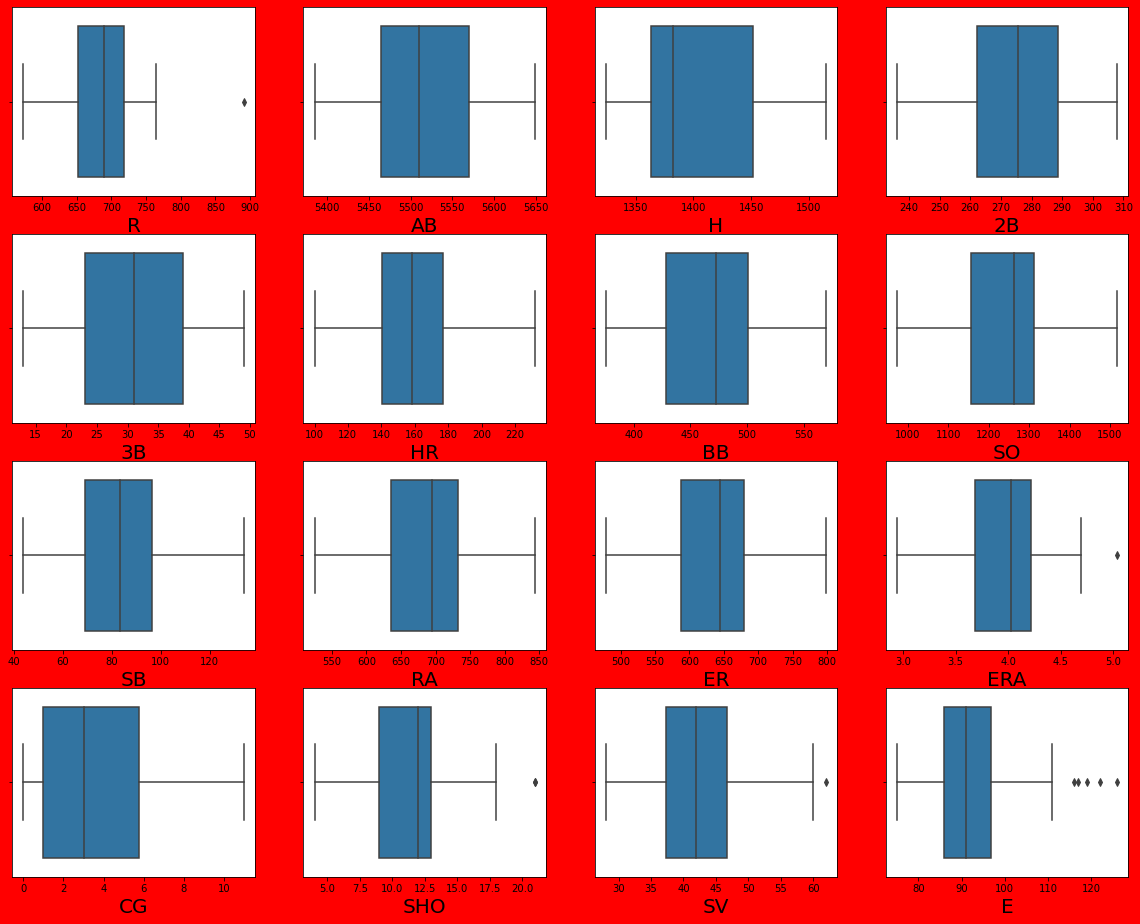

In [195]:
plt.figure(figsize=(20,16),facecolor='red')
graph = 1
for column in x:
    if graph <= 16:
        ax = plt.subplot(4,4,graph)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    graph += 1  
    
plt.show()

Need to use quantile method for coulmn E

In [196]:
df.shape

(15, 17)

In [197]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1

In [198]:
er_high = (q3.E + (1.5*IQR.E))
print(er_high)
index = np.where(df['E']>er_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

117.0
(14, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
1,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
2,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
3,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
4,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
5,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
6,12,85,661,5417,1331,243,21,176,435,1150,52,675,630,3.94,2,12,46,93
7,13,76,656,5544,1379,262,22,198,478,1336,69,726,677,4.16,6,12,45,94
8,18,68,655,5480,1378,274,34,145,412,1299,84,737,682,4.28,1,7,40,116
9,20,90,683,5527,1351,295,17,177,488,1290,51,613,557,3.43,1,14,50,88


In [199]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
12,85,661,5417,1331,243,21,176,435,1150,52,675,630,3.94,2,12,46,93
13,76,656,5544,1379,262,22,198,478,1336,69,726,677,4.16,6,12,45,94
18,68,655,5480,1378,274,34,145,412,1299,84,737,682,4.28,1,7,40,116
20,90,683,5527,1351,295,17,177,488,1290,51,613,557,3.43,1,14,50,88


In [200]:
x_1 = df.drop('W',axis=1)

In [201]:
y_1 = df.W

we need to select best feature which contribute the most in label. Will implement Select K best feature

In [202]:
best_feature = SelectKBest(score_func=f_classif,k=13)
fit = best_feature.fit(x_1,y_1)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_1.columns)
feature_score = pd.concat([df_columns,df_scores],axis=1)
feature_score.columns = ['Feature_Name','Score']
print(feature_score.nlargest(13,'Score'))

   Feature_Name      Score
15            E  10.377793
8            SB  10.034085
0             R   4.655833
9            RA   2.413476
13          SHO   1.962112
3            2B   1.842987
11          ERA   1.465205
7            SO   1.380918
10           ER   1.267963
5            HR   1.138219
1            AB   1.109601
14           SV   1.091010
12           CG   0.934495


In [203]:
new_x = df[['E','SB','R','RA','SHO','2B','ERA','SO','ER','HR','AB','SV','CG']]
new_x

,E,SB,R,RA,SHO,2B,ERA,SO,ER,HR,AB,SV,CG
1,86,70,696,700,12,277,4.07,1264,653,156,5467,45,2
3,101,68,622,701,9,260,3.98,1231,643,136,5533,37,7
4,86,83,689,803,12,289,4.64,1259,746,151,5605,35,7
6,93,63,764,698,4,272,4.03,1227,652,212,5567,48,3
7,77,44,713,693,10,246,4.05,1331,646,217,5485,43,0
9,97,71,748,753,10,294,4.31,1148,694,161,5640,40,3
12,93,52,661,675,12,243,3.94,1150,630,176,5417,46,2
13,94,69,656,726,12,262,4.16,1336,677,198,5544,45,6
18,116,84,655,737,7,274,4.28,1299,682,145,5480,40,1
20,88,51,683,613,14,295,3.43,1290,557,177,5527,50,1


In [204]:
from sklearn.preprocessing import StandardScaler

In [205]:
scaler = StandardScaler()

In [206]:
X_scaler = scaler.fit_transform(new_x)

In [207]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y_1,test_size=0.20,random_state=355)

In [208]:
from sklearn.linear_model import LinearRegression

In [209]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [210]:
y1_pred = linreg.predict(X_test)

In [211]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE for testing set: {}'.format(mean_absolute_error(y1_pred,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y1_pred,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y1_pred,y_test))))

MAE for testing set: 7.2219298598963775
MSE for testing set: 60.253262752704906
RMSE for testing set: 7.76229751766221


In [212]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train,y_train)

RandomForestRegressor()

In [213]:
y2_pred = linreg.predict(X_test)

In [214]:
print('MAE for testing set: {}'.format(mean_absolute_error(y2_pred,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y2_pred,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y2_pred,y_test))))

MAE for testing set: 7.2219298598963775
MSE for testing set: 60.253262752704906
RMSE for testing set: 7.76229751766221


In [215]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)

DecisionTreeRegressor()

In [216]:
y3_pred = linreg.predict(X_test)

In [217]:
print('MAE for testing set: {}'.format(mean_absolute_error(y3_pred,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y3_pred,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y3_pred,y_test))))

MAE for testing set: 7.2219298598963775
MSE for testing set: 60.253262752704906
RMSE for testing set: 7.76229751766221
